## <center><h3>**`PCA`**</h3></center>

---

## **1) PCA Concept**

### **A. Mathematical Idea**

PCA (**Principal Component Analysis**) is a dimensionality reduction technique that:

***Transforms*** data into a new coordinate system where axes (principal components) capture the **maximum variance** in the data.
* The **first component** captures the largest variance, the second the next largest **orthogonal** variance, and so on.

---

#### **Step-by-Step Math**

Let’s assume we have a dataset $X$ with $n$ samples and $p$ features.

**1. Standardize Data**
We subtract the mean and divide by the standard deviation:

$$
Z_{ij} = \frac{X_{ij} - \mu_j}{\sigma_j}
$$

This is important because PCA is affected by scale.

**2. Covariance Matrix**
We compute:

$$
\Sigma = \frac{1}{n-1} Z^T Z
$$

This matrix shows how features vary together.

**3. Eigen Decomposition**
We solve:

$$
\Sigma v_k = \lambda_k v_k
$$

Where:

* $v_k$ = eigenvector (principal component direction)
* $\lambda_k$ = eigenvalue (variance explained by that component)

**4. Sort Components**
We order eigenvectors by descending eigenvalues.

**5. Project Data**
We transform data to the new coordinate system:

$$
Y = Z V_k
$$

Where $V_k$ contains the top $k$ eigenvectors.

---



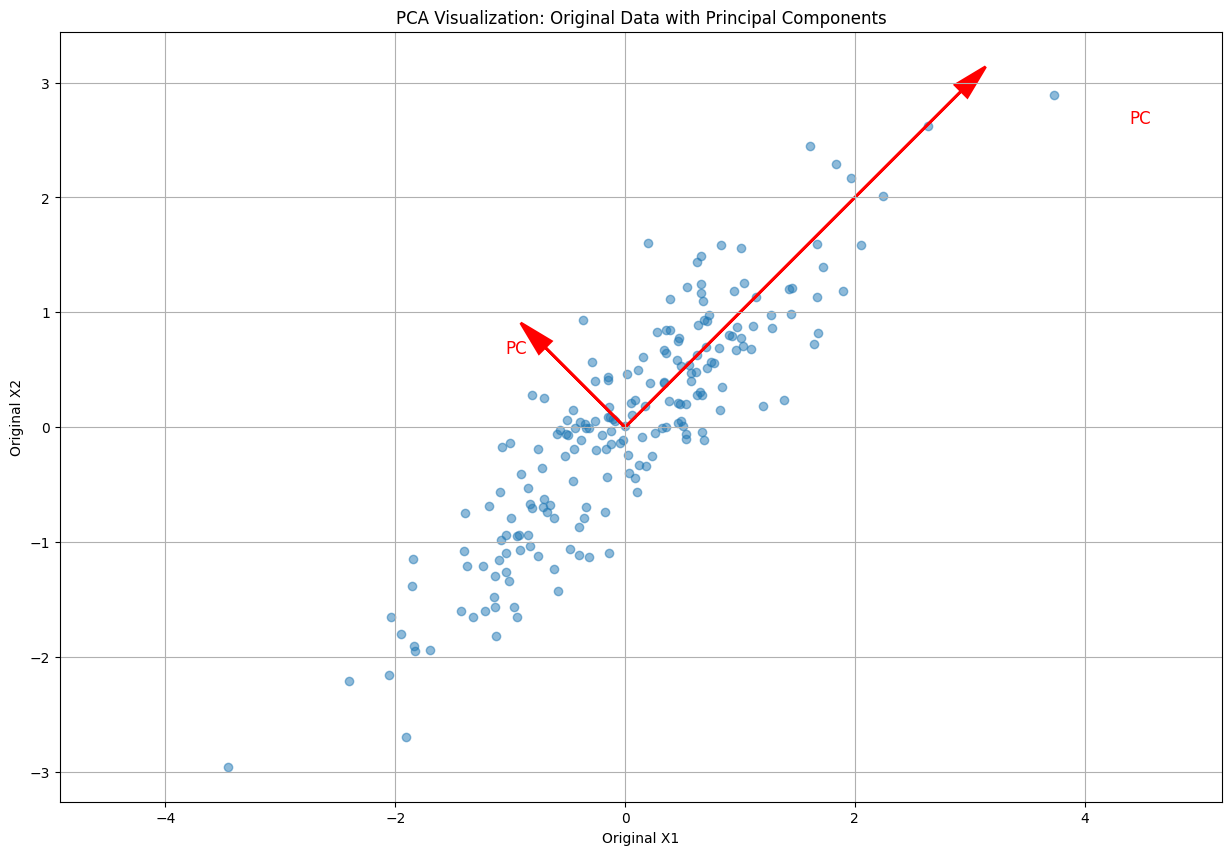

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Generate elongated cloud of points
np.random.seed(42)
X = np.dot(np.random.rand(2, 2), np.random.randn(2, 200)).T
X[:, 0] = X[:, 0] * 3  # stretch in one direction

# Standardize
X_std = StandardScaler().fit_transform(X)

# Fit PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)
components = pca.components_
mean = pca.mean_

# Plot original data
plt.figure(figsize=(15, 10))
plt.scatter(X_std[:, 0], X_std[:, 1], alpha=0.5)
plt.xlabel('Original X1')
plt.ylabel('Original X2')
plt.title('PCA Visualization: Original Data with Principal Components')

# Plot principal components as arrows
for length, vector in zip(pca.explained_variance_, components):
    v = vector * 3 * np.sqrt(length)
    plt.arrow(mean[0], mean[1], v[0], v[1], 
              head_width=0.15, head_length=0.3, color='red', linewidth=2)
    plt.text(mean[0] + v[0]*1.5, mean[1]+.015 + v[1]*.9, 
             f'PC', color='red', fontsize=12)

plt.grid(True)
plt.axis('equal')
plt.show()

# [
# [33,,4,,5,5,5,],
# [33,,4,,5,5,5,],
# [33,,4,,5,5,5,],
# [33,,4,,5,5,5,],
# [33,,4,,5,5,5,],
# [33,,4,,5,5,5,],]==>[[1,2],[3,4]]

The blue cloud is the original 2D data.
The **red arrows** show the **principal components**:

* **PC1** = the long axis (max variance direction).
* **PC2** = the short axis (remaining variance).

If we drop PC2, we reduce dimensions while keeping most of the information.
### **C. Interpretation**

* **PC1** is the direction of maximum variance.
* **PC2** is the direction of remaining variance.
* **PC1** explains most of the variance, so it’s the most important direction.
* **PC2** explains less variance, so it’s less important.

### **D. Application**

* **PCA** is used for **dimensionality reduction**.
* **PCA** is used for **data visualization**.
* **PCA** is used for **feature extraction**.
* **PCA** is used for **noise reduction**.


## **2) Code — Selecting the Number of Components in PCA**

We can use the **explained variance ratio** and **cumulative variance** to decide.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

In [3]:
# Load example data
data = load_iris()
X = data.data

In [4]:
# 1. Standardize data
X_std = StandardScaler().fit_transform(X)

In [5]:
# 2. Apply PCA without specifying components
pca = PCA()
pca.fit(X_std)

PCA()

In [6]:
# 3. Explained variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

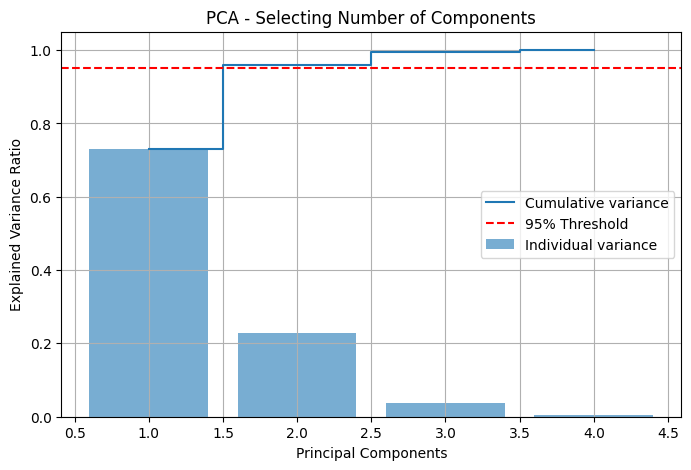

In [7]:
# 4. Plot explained variance
plt.figure(figsize=(8,5))
plt.bar(range(1, len(explained_variance)+1), explained_variance, alpha=0.6, label='Individual variance')
plt.step(range(1, len(cumulative_variance)+1), cumulative_variance, where='mid', label='Cumulative variance')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Threshold')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA - Selecting Number of Components')
plt.legend()
plt.grid(True)
plt.show()


In [8]:
# 5. Select number of components for 95% variance
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Number of components for >=95% variance: {n_components_95}")

Number of components for >=95% variance: 2


* **Bar chart** = variance each component explains.
* **Step line** = cumulative variance (sum).
* The **red dashed line** = target threshold (e.g., 95%).
* Code automatically finds the smallest `k` such that cumulative variance ≥ 95%.